In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
try:
    df = pd.read_csv("./data/Salary_Data.csv")
except FileNotFoundError:
    print("Error: 'Salary_Data.csv' not found. Please download the dataset and place it in the correct directory.")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [4]:
print(f"\nNumber of unique Job Titles: {df['Job Title'].nunique()}")


Number of unique Job Titles: 193


In [5]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [6]:
df = df.dropna()

In [7]:
df["Experience_per_Age"] = df["Years of Experience"] / df["Age"]
df["Experience_per_Age"] = df["Experience_per_Age"].replace([np.inf, -np.inf], 0).fillna(0)

ValueError: could not convert string to float: 'Male'

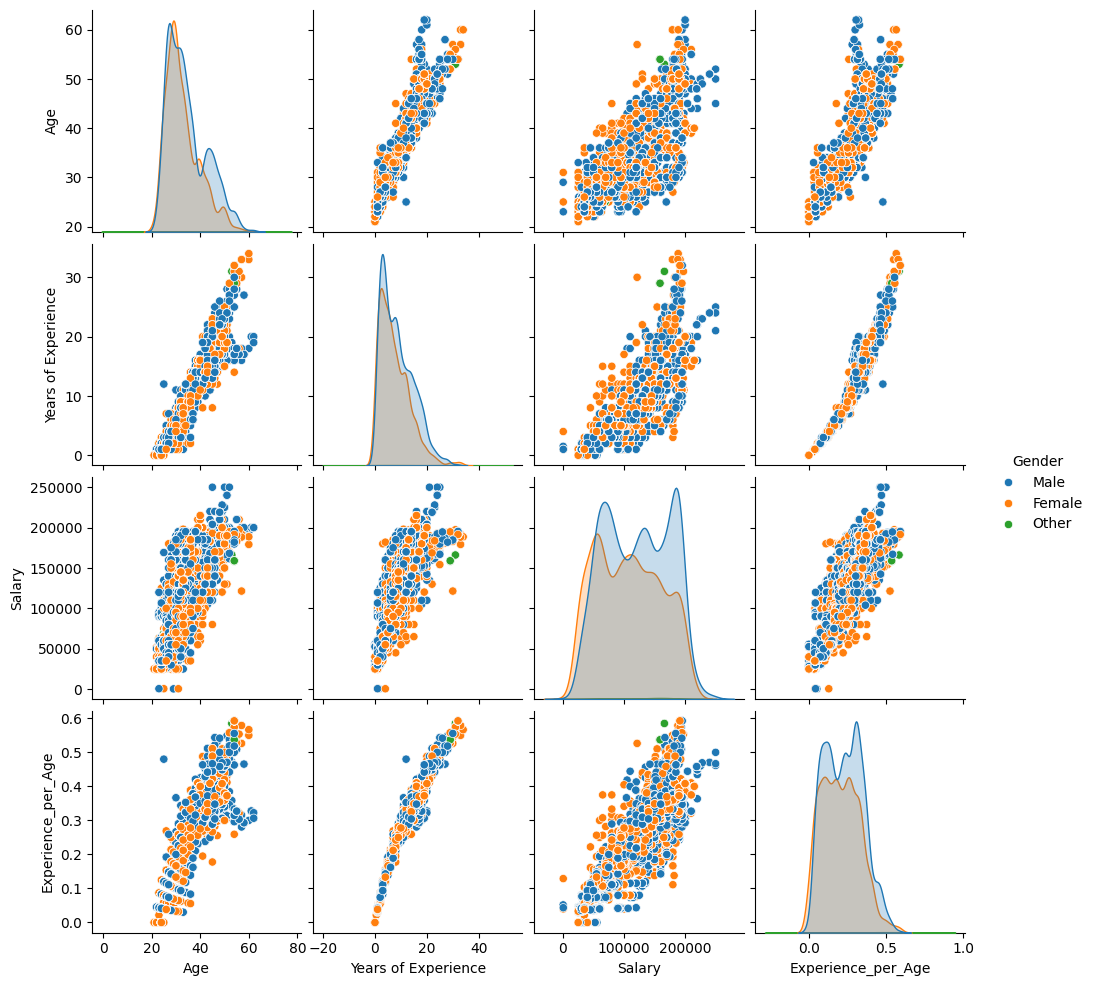

<Figure size 800x500 with 0 Axes>

In [8]:
sns.pairplot(df, hue="Gender")
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [9]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Select features
numeric_features = ["Age", "Years of Experience", "Experience_per_Age"]
categorical_features = ["Gender", "Education Level", "Job Title"]

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df

,Model,RMSE,MAE,R²
2,Random Forest,6937.083286,2776.250287,0.983123
1,Decision Tree,8037.393524,2730.143975,0.977345
3,Gradient Boosting,13926.272916,10273.078631,0.931985
0,Linear Regression,16303.524329,11400.678900,0.906783
4,SVR,52948.558698,45878.469187,0.016802
